In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
df = pd.read_csv('covid_de.csv', parse_dates = ['date'])
df['gender'].fillna('Not Reported', inplace = True)
df.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790555 entries, 0 to 2790554
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   state      object        
 1   county     object        
 2   age_group  object        
 3   gender     object        
 4   date       datetime64[ns]
 5   cases      int64         
 6   deaths     int64         
 7   recovered  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 170.3+ MB


In [4]:
df.describe()

,cases,deaths,recovered
count,2.790555e+06,2.790555e+06,2.790555e+06
mean,1.333496e+01,5.761148e-02,1.305119e+01
std,3.009627e+01,3.214108e-01,3.006811e+01
min,1.000000e+00,0.000000e+00,-1.000000e+00
25%,2.000000e+00,0.000000e+00,1.000000e+00
50%,4.000000e+00,0.000000e+00,4.000000e+00
75%,1.200000e+01,0.000000e+00,1.200000e+01
max,2.156000e+03,2.100000e+01,2.156000e+03


In [5]:
df.columns

Index(['state', 'county', 'age_group', 'gender', 'date', 'cases', 'deaths',
       'recovered'],
      dtype='object')

In [6]:
df_sorted_bydate = df.sort_values(by = 'date')
#df_sorted_bydate['cases_cum'] = np.cumsum(df_sorted_bydate.cases)
#df_sorted_bydate['recovered_cum'] = np.cumsum(df_sorted_bydate.recovered)
df_sorted_bydate.head(25)

,state,county,age_group,gender,date,cases,deaths,recovered
1800942,Nordrhein-Westfalen,LK Maerkischer Kreis,80-99,M,2020-01-02,1,0,1
2392802,Saarland,LK Stadtverband Saarbruecken,80-99,M,2020-01-23,1,0,1
560062,Bayern,LK Landsberg a.Lech,15-34,M,2020-01-28,1,0,1
738918,Bayern,LK Starnberg,35-59,M,2020-01-28,1,0,1
882124,Bayern,SK Muenchen,15-34,F,2020-01-29,1,0,1
498509,Bayern,LK Fuerstenfeldbruck,15-34,M,2020-01-29,1,0,1
500272,Bayern,LK Fuerstenfeldbruck,35-59,M,2020-01-31,1,0,1
757660,Bayern,LK Traunstein,35-59,M,2020-01-31,1,0,1
2361825,Saarland,LK Neunkirchen,15-34,F,2020-01-31,1,0,1
753244,Bayern,LK Traunstein,00-04,F,2020-01-31,1,0,1


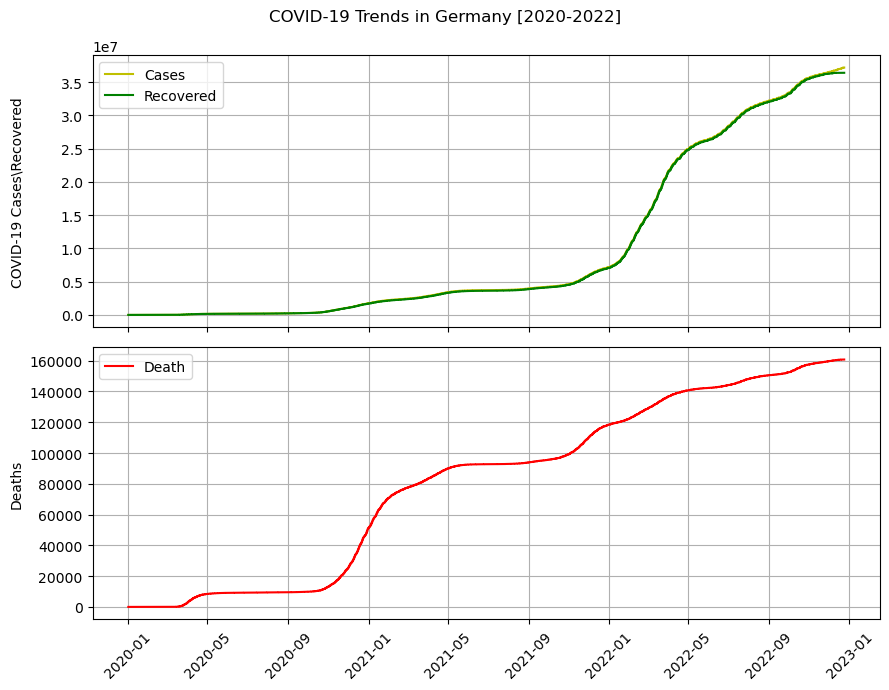

In [7]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex = True, figsize = (9,7))
fig.suptitle ("COVID-19 Trends in Germany [2020-2022]")

ax1.plot(df_sorted_bydate.date,np.cumsum(df_sorted_bydate.cases), 'y-', label = 'Cases')
ax1.plot(df_sorted_bydate.date,np.cumsum(df_sorted_bydate.recovered), 'g-', label = 'Recovered')
# ax1.plot(df_sorted_bydate.date,np.cumsum(df_sorted_bydate.deaths), 'r-', label = 'Death')

ax1.set_ylabel('COVID-19 Cases\Recovered')
ax1.grid()
ax1.legend(loc = 'upper left' )

ax2.plot(df_sorted_bydate.date,np.cumsum(df_sorted_bydate.deaths), 'r-', label = 'Death')
# ax2.plot(df.date,df.deaths, 'r*', label = 'Death')
ax2.set_ylabel('Deaths')
ax2.grid()
ax2.legend(loc = 'upper left' )
ax2.tick_params(axis = 'x', rotation = 45)

fig.align_labels()
fig.tight_layout()

plt.show()

<AxesSubplot:title={'center':'Cases/Deaths/Recovery by State in Germany'}, ylabel='state'>

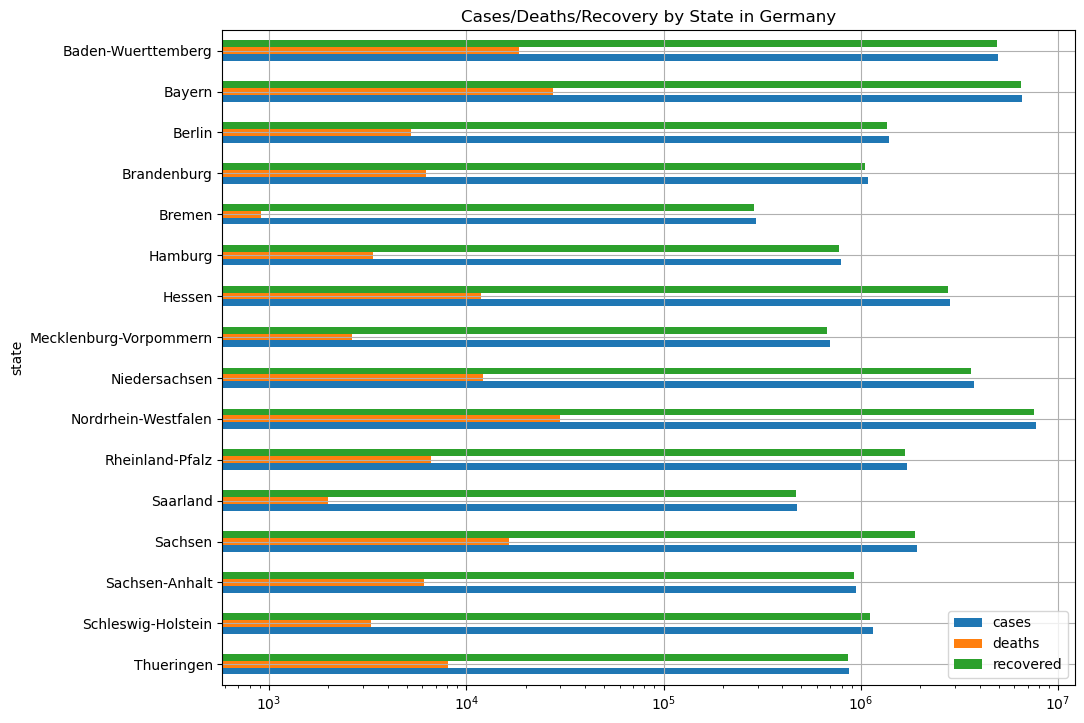

In [8]:
summary_state = df.groupby(['state']).agg('sum').round(0)
#summary_state

summary_state_df = pd.DataFrame(summary_state)
summary_state_df = summary_state_df.iloc[::-1]
summary_state_df.plot(kind = 'barh', logx = True, title = 'Cases/Deaths/Recovery by State in Germany', figsize = (11,8.5), grid = True)
#summary_state_df.plot.barh().set_xscale('log')

## Are there differences between genders in getting sick, recovery ratio, death ratio - Felix 

In [9]:
summary_gender = df.groupby('gender').agg('sum').round(0)
summary_gender_df = pd.DataFrame(summary_gender)
summary_gender_df['recovery_rate'] = (summary_gender_df.recovered/summary_gender_df.cases).astype(float).map("{:.2%}".format)
summary_gender_df['death_rate'] = (summary_gender_df.deaths/summary_gender_df.cases).astype(float).map("{:.2%}".format)
summary_gender_df

,cases,deaths,recovered,recovery_rate,death_rate
gender,,,,,
F,19232524,74716,18814046,97.82%,0.39%
M,17659283,85823,17291357,97.92%,0.49%
Not Reported,320144,229,314665,98.29%,0.07%


## Are there differences in different age groups ( same parameters as above) – Felix

In [10]:
summary_age_group = df.groupby('age_group').agg('sum').round(0)
summary_age_group_df = pd.DataFrame(summary_age_group)
summary_age_group_df['recovery_rate'] = (summary_age_group_df.recovered/summary_age_group_df.cases).astype(float).map("{:.3%}".format)
summary_age_group_df['death_rate'] = (summary_age_group_df.deaths/summary_age_group_df.cases).astype(float).map("{:.3%}".format)
summary_age_group_df_rates = summary_age_group_df[['recovery_rate','death_rate']]
summary_age_group_df_rates
# summary_age_group_df_rates.plot(kind = 'bar')
# summary_age_group_df['death_rate']

,recovery_rate,death_rate
age_group,,
00-04,99.566%,0.004%
05-14,99.632%,0.001%
15-34,98.641%,0.004%
35-59,98.003%,0.055%
60-79,96.428%,0.993%
80-99,89.203%,7.005%


In [11]:
summary_state_gender = df.groupby(['state','gender']).agg('sum').round(0)
summary_state_gender.unstack(-1)
#summary_state_gender

cases                       deaths         \
gender                        F        M Not Reported      F      M   
state                                                                 
Baden-Wuerttemberg      2549671  2381559        24732   8499   9987   
Bayern                  3386173  3164820        46093  12980  14397   
Berlin                   715453   633538        47004   2414   2814   
Brandenburg              574605   501603        12492   2940   3342   
Bremen                   153194   141777          229    424    489   
Hamburg                  412114   375197         5502   1495   1857   
Hessen                  1454096  1348027        36003   5489   6330   
Mecklenburg-Vorpommern   370287   323338         1538   1197   1442   
Niedersachsen           1905635  1781305        39339   5714   6491   
Nordrhein-Westfalen     4003967  3674509        63149  13618  16076   
Rheinland-Pfalz          880281   813195        21530   3200   3406   
Saarland                 249328   226292         1741    955   1044   
Sachsen                 1025998   901855           77   7643   8875   
Sachsen-Anhalt           498266   439890         4940   2867   3233   
Schleswig-Holstein       590210   547132        12736   1541   1738   
Thueringen               463246   405246         3039   3740   4302   

                                    recovered                        
gender                 Not Reported         F        M Not Reported  
state                                                                
Baden-Wuerttemberg                8   2508944  2345655        24462  
Bayern                           75   3347794  3129488        45742  
Berlin                            8    694896   616381        46391  
Brandenburg                       2    555268   485123        12373  
Bremen                            0    149550   138695          218  
Hamburg                           0    402530   366923         5152  
Hessen                           38   1423205  1321493        35224  
Mecklenburg-Vorpommern            0    360314   314539         1506  
Niedersachsen                    25   1846196  1729200        38539  
Nordrhein-Westfalen              36   3904057  3586745        61729  
Rheinland-Pfalz                  20    861593   797161        21305  
Saarland                          3    244795   222348         1716  
Sachsen                           0   1001787   879429           46  
Sachsen-Anhalt                    7    485483   428748         4851  
Schleswig-Holstein                3    571994   531531        12388  
Thueringen                        4    455640   397898         3023

In [12]:
summary_state_gender_age = pd.DataFrame(df.groupby(['state','gender','age_group']).agg('sum').round(0))
summary_state_gender_age#.unstack(-1)
#print(summary_state_gender_age.head())
#summary_state_gender_age.index
#summary_state_gender_age.columns

state_population = pd.read_csv("demographics_de.csv")
Dict = {'female':'F', 'male':'M'}
state_population.replace({'gender':Dict}, inplace = True)
state_population.set_index(['state','gender','age_group'], inplace = True)
#print(state_population.head())

summary_state_gender_age_population = summary_state_gender_age.join(state_population, how = 'left')

#create function for percentage calculation and representation

def PercentagePerPolpulation(part_of_population, population):
    #return part_of_population/population.astype(float).map("{:.2%}".format)
    return part_of_population/population

summary_state_gender_age_population['cases per population'] = summary_state_gender_age_population.apply(lambda x: PercentagePerPolpulation(x['cases'],x['population']), axis = 1)
summary_state_gender_age_population['deaths per population'] = summary_state_gender_age_population.apply(lambda x: PercentagePerPolpulation(x['deaths'],x['population']), axis = 1)
summary_state_gender_age_population['recoveries per population'] = summary_state_gender_age_population.apply(lambda x: PercentagePerPolpulation(x['recovered'],x['population']), axis = 1)


# def PercentagePresentation(percentage):
#     return str(percentage).map("{:.2%}".format)

# summary_state_gender_age_population['cases per population'] = summary_state_gender_age_population.apply(lambda x: PercentagePresentation(x['cases per population']), axis = 1 )

summary_state_gender_age_population['cases per population'] = summary_state_gender_age_population['cases per population'].astype(float).map("{:.2%}".format)
summary_state_gender_age_population['deaths per population'] = summary_state_gender_age_population['deaths per population'].astype(float).map("{:.2%}".format)
summary_state_gender_age_population['recoveries per population'] = summary_state_gender_age_population['recoveries per population'].astype(float).map("{:.2%}".format)

pd.set_option('display.max_rows',300)

summary_state_gender_age_population.to_csv('SummaryByStateGenderAge.csv')
summary_state_gender_age_population

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:2201: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


cases  deaths  recovered  \
state                  gender       age_group                               
Baden-Wuerttemberg     F            00-04        66249       4      66032   
                                    05-14       293446       4     292887   
                                    15-34       764362      21     756813   
                                    35-59      1003754     298     989018   
                                    60-79       319322    1892     311156   
                                    80-99       101669    6280      92178   
                       M            00-04        70145       4      69928   
                                    05-14       313858       2     313308   
                                    15-34       726528      33     720457   
                                    35-59       895901     695     884050   
                                    60-79       304447    3498     295226   
                                    80-99        69855    5755      61875   
                       Not Reported 00-04          903       0        897   
                                    05-14         3702       0       3698   
                                    15-34         8082       0       8015   
                                    35-59         8949       3       8842   
                                    60-79         2534       2       2468   
                                    80-99          411       3        392   
Bayern                 F            00-04        90420       5      90240   
                                    05-14       381520       4     381085   
                                    15-34      1013396      31    1007573   
                                    35-59      1329786     412    1318556   
                                    60-79       424419    2844     416560   
                                    80-99       145820    9684     132972   
                       M            00-04        95963       3      95742   
                                    05-14       410773       2     410285   
                                    15-34       963375      37     958681   
                                    35-59      1193030     886    1183509   
                                    60-79       405755    5106     395917   
                                    80-99        95144    8363      84575   
                       Not Reported 00-04         1719       0       1717   
                                    05-14         7907       0       7901   
                                    15-34        14058       0      13993   
                                    35-59        16449       3      16307   
                                    60-79         4722      24       4654   
                                    80-99         1173      48       1105   
Berlin                 F            00-04        17730       0      17636   
                                    05-14        77421       1      76847   
                                    15-34       240500       6     235644   
                                    35-59       279282      73     271198   
                                    60-79        72045     571      68492   
                                    80-99        28086    1762      24699   
                       M            00-04        18900       3      18791   
                                    05-14        82954       0      82374   
                                    15-34       205248       8     201512   
                                    35-59       241510     171     235009   
                                    60-79        66595    1095      62941   
                                    80-99        17965    1537      15400   
                       Not Reported 00-04          960       0        955   
                                    05-14         5750       0       5734   
                                    15-34    

In [45]:
QSummary = df.set_index('date').resample('3M')['cases','deaths','recovered'].sum()
QSummary.head()

,cases,deaths,recovered
date,,,
2020-01-31,10,0,10
2020-04-30,162242,8423,153819
2020-07-31,47915,988,46927
2020-10-31,336419,3704,332714
2021-01-31,1674714,57634,1617077


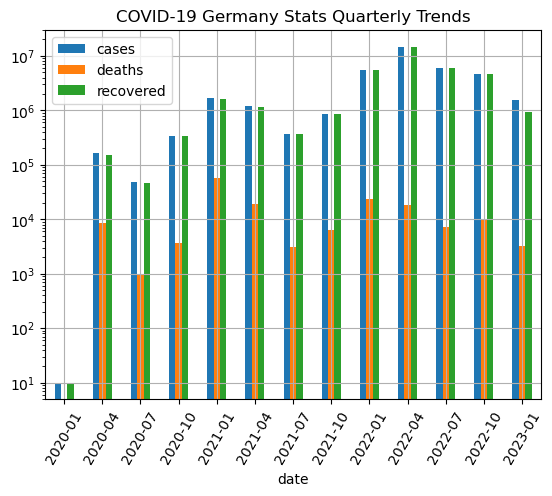

In [14]:
ax = QSummary.plot(kind = 'bar',logy = True, grid =True, title = 'COVID-19 Germany Stats Quarterly Trends')
ax.set_xticklabels([date.strftime("%Y-%m") for date in QSummary.index],rotation=60)
plt.show()

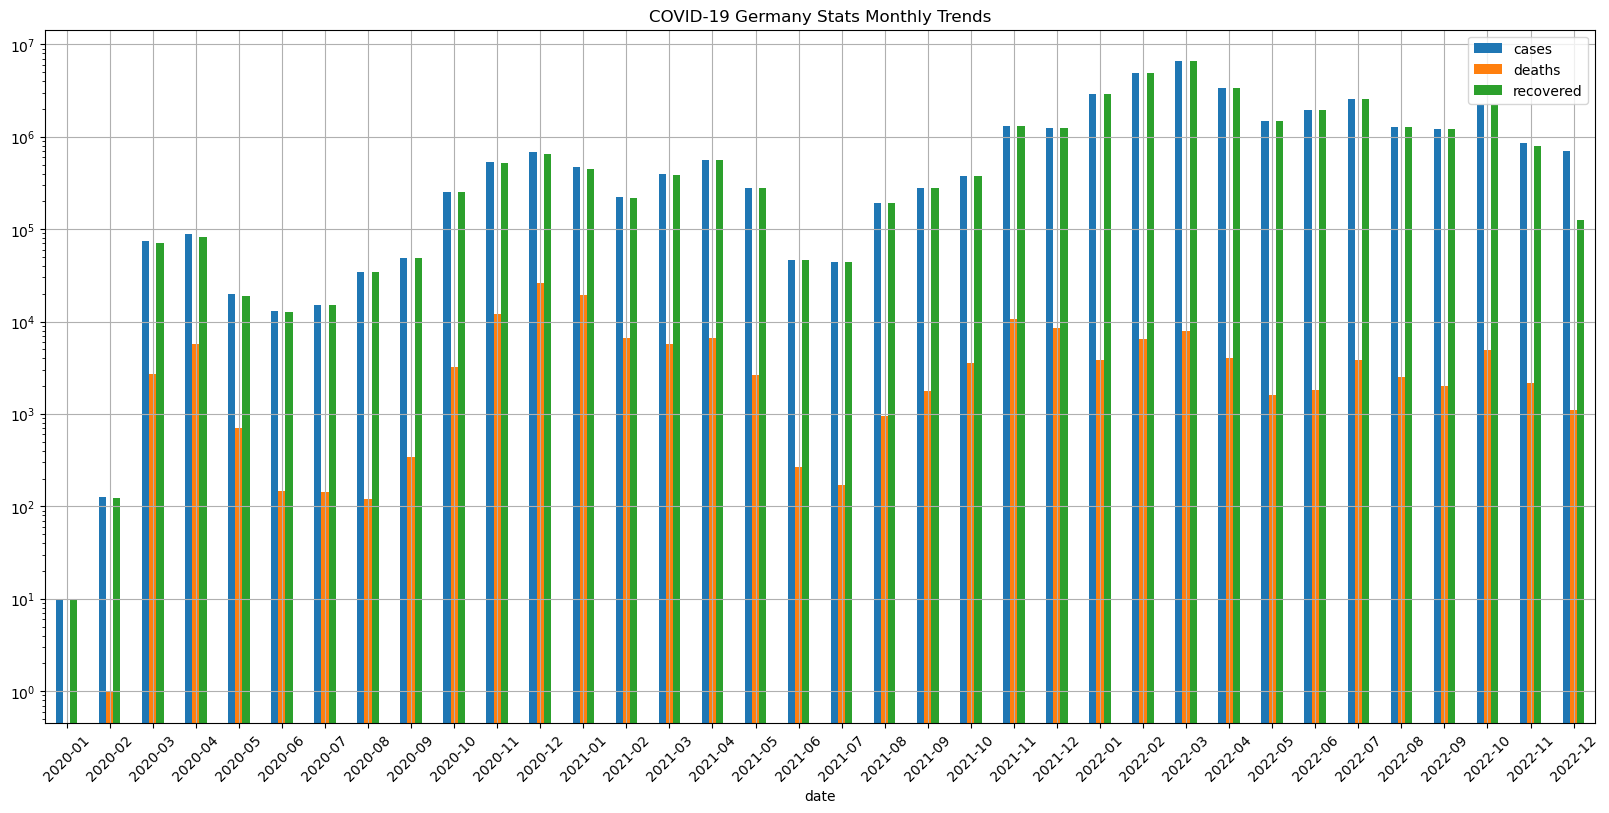

In [15]:
df.reset_index()
MSummary = df.set_index('date').resample('1M')['cases','deaths','recovered'].sum()
ax = MSummary.plot(kind = 'bar',logy = True, grid =True, title = 'COVID-19 Germany Stats Monthly Trends', figsize = (20,9))
ax.set_xticklabels([date.strftime("%Y-%m") for date in MSummary.index], rotation = 45)
plt
plt.show()

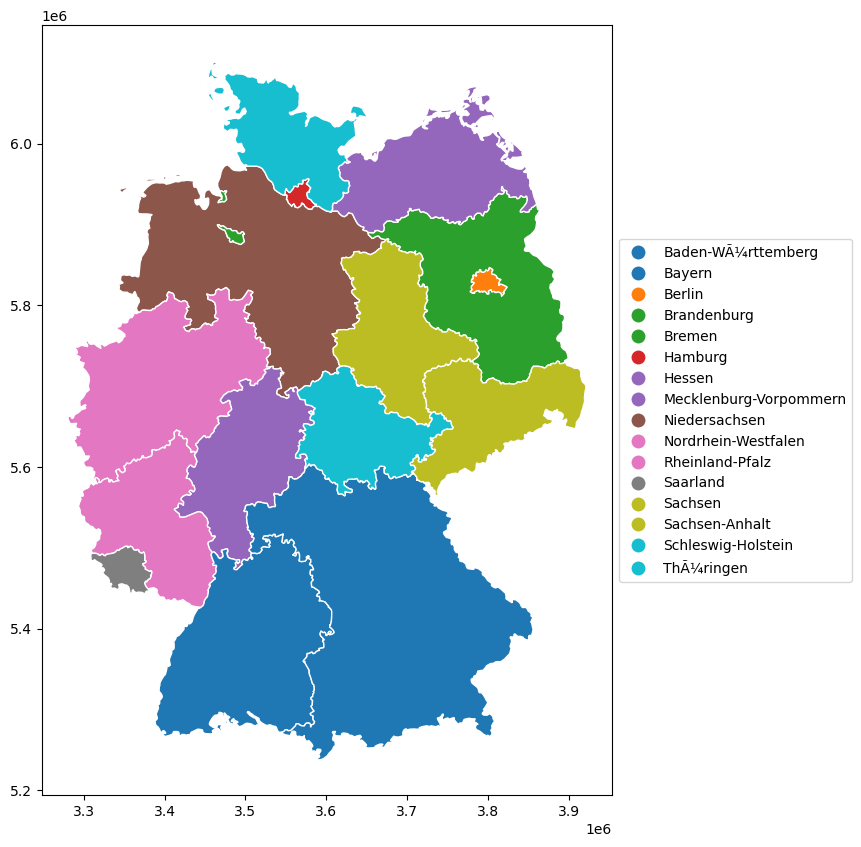

In [16]:
import geopandas as gpd

gdf = gpd.read_file("de_state.shp")
gdf.plot(categorical = True, column = 'GEN', legend = True,figsize = (10,10),edgecolor = 'white', legend_kwds = {'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
plt.show()


In [17]:
gdf

,ADE,RS,RS_0,GEN,geometry
0,2,02,020000000000,Hamburg,"MULTIPOLYGON (((3578695.661 5955304.456, 35781..."
1,2,03,030000000000,Niedersachsen,"MULTIPOLYGON (((3354775.046 5942939.764, 33546..."
2,2,04,040000000000,Bremen,"MULTIPOLYGON (((3468658.496 5898364.974, 34702..."
3,2,05,050000000000,Nordrhein-Westfalen,"POLYGON ((3477450.781 5820982.368, 3479895.578..."
4,2,06,060000000000,Hessen,"POLYGON ((3535084.230 5721608.644, 3535279.888..."
5,2,07,070000000000,Rheinland-Pfalz,"POLYGON ((3418896.770 5638774.098, 3419770.012..."
6,2,08,080000000000,Baden-WÃ¼rttemberg,"MULTIPOLYGON (((3475285.294 5283087.348, 34749..."
7,2,09,090000000000,Bayern,"POLYGON ((3609551.484 5269631.549, 3610838.499..."
8,2,10,100000000000,Saarland,"POLYGON ((3360522.937 5500321.672, 3361336.128..."
9,2,11,110000000000,Berlin,"POLYGON ((3812872.568 5833365.938, 3813771.098..."


In [18]:
StatesNamesMapDict = {}
for state_gdf, state_data in zip(sorted(gdf['GEN']), sorted(df['state'].unique())):
    StatesNamesMapDict[state_gdf] = state_data
#     print (state_gdf, state_data)
StatesNamesMapDict


{'Baden-WÃ¼rttemberg': 'Baden-Wuerttemberg',
 'Bayern': 'Bayern',
 'Berlin': 'Berlin',
 'Brandenburg': 'Brandenburg',
 'Bremen': 'Bremen',
 'Hamburg': 'Hamburg',
 'Hessen': 'Hessen',
 'Mecklenburg-Vorpommern': 'Mecklenburg-Vorpommern',
 'Niedersachsen': 'Niedersachsen',
 'Nordrhein-Westfalen': 'Nordrhein-Westfalen',
 'Rheinland-Pfalz': 'Rheinland-Pfalz',
 'Saarland': 'Saarland',
 'Sachsen': 'Sachsen',
 'Sachsen-Anhalt': 'Sachsen-Anhalt',
 'Schleswig-Holstein': 'Schleswig-Holstein',
 'ThÃ¼ringen': 'Thueringen'}

In [19]:
gdf['GEN'].replace(StatesNamesMapDict, inplace = True)

In [20]:
gdf.set_index('GEN', inplace = True)

In [21]:
summary_state

,cases,deaths,recovered
state,,,
Baden-Wuerttemberg,4955962,18494,4879061
Bayern,6597086,27452,6523024
Berlin,1395995,5236,1357668
Brandenburg,1088700,6284,1052764
Bremen,295200,913,288463
Hamburg,792813,3352,774605
Hessen,2838126,11857,2779922
Mecklenburg-Vorpommern,695163,2639,676359
Niedersachsen,3726279,12230,3613935


In [22]:
StatsByState = gdf.join(summary_state)
StatsByState.reset_index(inplace = True)
StatsByState

,GEN,ADE,RS,RS_0,geometry,cases,deaths,recovered
0,Hamburg,2,02,020000000000,"MULTIPOLYGON (((3578695.661 5955304.456, 35781...",792813,3352,774605
1,Niedersachsen,2,03,030000000000,"MULTIPOLYGON (((3354775.046 5942939.764, 33546...",3726279,12230,3613935
2,Bremen,2,04,040000000000,"MULTIPOLYGON (((3468658.496 5898364.974, 34702...",295200,913,288463
3,Nordrhein-Westfalen,2,05,050000000000,"POLYGON ((3477450.781 5820982.368, 3479895.578...",7741625,29730,7552531
4,Hessen,2,06,060000000000,"POLYGON ((3535084.230 5721608.644, 3535279.888...",2838126,11857,2779922
5,Rheinland-Pfalz,2,07,070000000000,"POLYGON ((3418896.770 5638774.098, 3419770.012...",1715006,6626,1680059
6,Baden-Wuerttemberg,2,08,080000000000,"MULTIPOLYGON (((3475285.294 5283087.348, 34749...",4955962,18494,4879061
7,Bayern,2,09,090000000000,"POLYGON ((3609551.484 5269631.549, 3610838.499...",6597086,27452,6523024
8,Saarland,2,10,100000000000,"POLYGON ((3360522.937 5500321.672, 3361336.128...",477361,2002,468859
9,Berlin,2,11,110000000000,"POLYGON ((3812872.568 5833365.938, 3813771.098...",1395995,5236,1357668


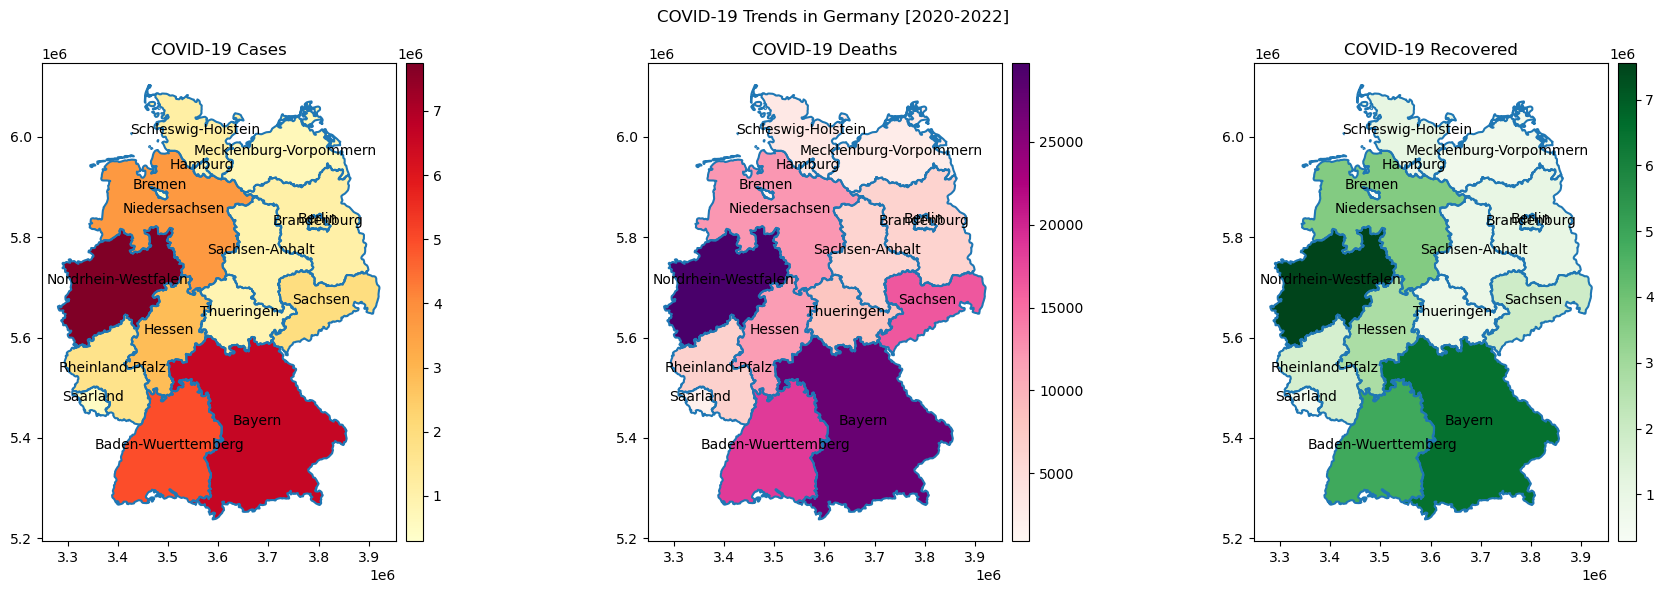

In [50]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (18,6))
fig.suptitle ("COVID-19 Trends in Germany [2020-2022]")

StatsByState["geometry"].boundary.plot(ax=ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
StatsByState.plot( column='cases', ax=ax1, cmap='YlOrRd', legend=True, cax = cax)
StatsByState.apply(lambda x: ax1.annotate(text=x['GEN'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax1.set_title("COVID-19 Cases")

StatsByState["geometry"].boundary.plot(ax = ax2)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.1)
StatsByState.plot( column='deaths', ax=ax2, cmap='RdPu',legend=True, cax = cax)
StatsByState.apply(lambda x: ax2.annotate(text=x['GEN'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax2.set_title('COVID-19 Deaths')

StatsByState["geometry"].boundary.plot(ax = ax3)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.1)
StatsByState.plot( column='recovered', ax=ax3, cmap='Greens', legend=True, cax = cax )
StatsByState.apply(lambda x: ax3.annotate(text=x['GEN'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax3.set_title('COVID-19 Recovered')

#fig.align_labels()
fig.tight_layout()

plt.show()